## INTRO
In this assignment, we will focus on classification in the context of the travel insurance industry. The main problem that will be raised is how to predict whether someone will get travel insurance or not based on a number of relevant features.

The goal of this assignment is to build a classification model that can predict travel insurance acceptance with high accuracy. Thus, insurance companies can improve their marketing strategies and product offerings more effectively, which in turn can increase sales and customer satisfaction.

## DESCRIPTION ABOUT THE DATASET
- Agency = Code of the travel agency that manages insurance

- Agency Type = Type of Travel Agency

- Distribution Channel = How the product is sold

- Product Name = Name of the insurance product sold

- Claim = Insurance claim status

- Duration = Duration of the trip in days

- Destination = Country to go to

- Net Sales = Net insurance sales

- Commission = Commission received by the insurance agent

- Gender = Gender of the insurance holder

- Age = Age of the insurance holder

## DATA PREPROCESSING & HANDLING MISSING VALUES



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data = pd.read_csv('travel insurance.csv')
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [ ]:
# Melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [ ]:
# Menghitung missing value
data.isna().sum()

,0
Agency,0
Agency Type,0
Distribution Channel,0
Product Name,0
Claim,0
Duration,0
Destination,0
Net Sales,0
Commision (in value),0
Gender,45107


There is no missing data, except in the gender column with 45107 rows. Due to the large number of missing values, rows with missing data will be dropped

In [ ]:
data.dropna(subset = ['Gender'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18219 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                18219 non-null  object 
 1   Agency Type           18219 non-null  object 
 2   Distribution Channel  18219 non-null  object 
 3   Product Name          18219 non-null  object 
 4   Claim                 18219 non-null  object 
 5   Duration              18219 non-null  int64  
 6   Destination           18219 non-null  object 
 7   Net Sales             18219 non-null  float64
 8   Commision (in value)  18219 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   18219 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


Removing missing values ​​in the gender column

In [ ]:
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
11,JZI,Airlines,Online,Basic Plan,No,1,MALAYSIA,-18.0,6.30,M,47
12,KML,Travel Agency,Online,Premier Plan,No,53,NORWAY,-130.0,49.40,F,48


In [ ]:
data.describe()

,Duration,Net Sales,Commision (in value),Age
count,18219.000000,18219.000000,18219.000000,18219.000000
mean,68.708491,57.488890,18.480432,44.785444
std,112.977561,73.884899,24.963075,20.894323
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,22.000000,6.750000,31.000000
50%,21.000000,30.000000,9.750000,40.000000
75%,57.000000,54.500000,16.750000,52.000000
max,740.000000,810.000000,283.500000,118.000000


- After dropping NA, the rows in this data total 18219 rows and 11 columns

## EDA

### OUTLIER CHECK

In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns

for col in numerical_cols:
    fig = px.box(data, y=col, title=f'Boxplot of {col}',
                labels={col: f'{col.capitalize()}'})
    fig.update_layout(
        width=800,
        height=500,
        xaxis_tickangle=0
    )
    fig.show()

### Categorical Distribution

In [ ]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
  fig = px.histogram(data, x=col, title=f'Histogram of {col}',
                      labels={col: f'{col.capitalize()}'})
  fig.update_layout(
      width=800,
      height=500,
      xaxis_tickangle=0
  )
  fig.show()

### CORRELATION TEST

<ipython-input-10-4d2d3389aa35>:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



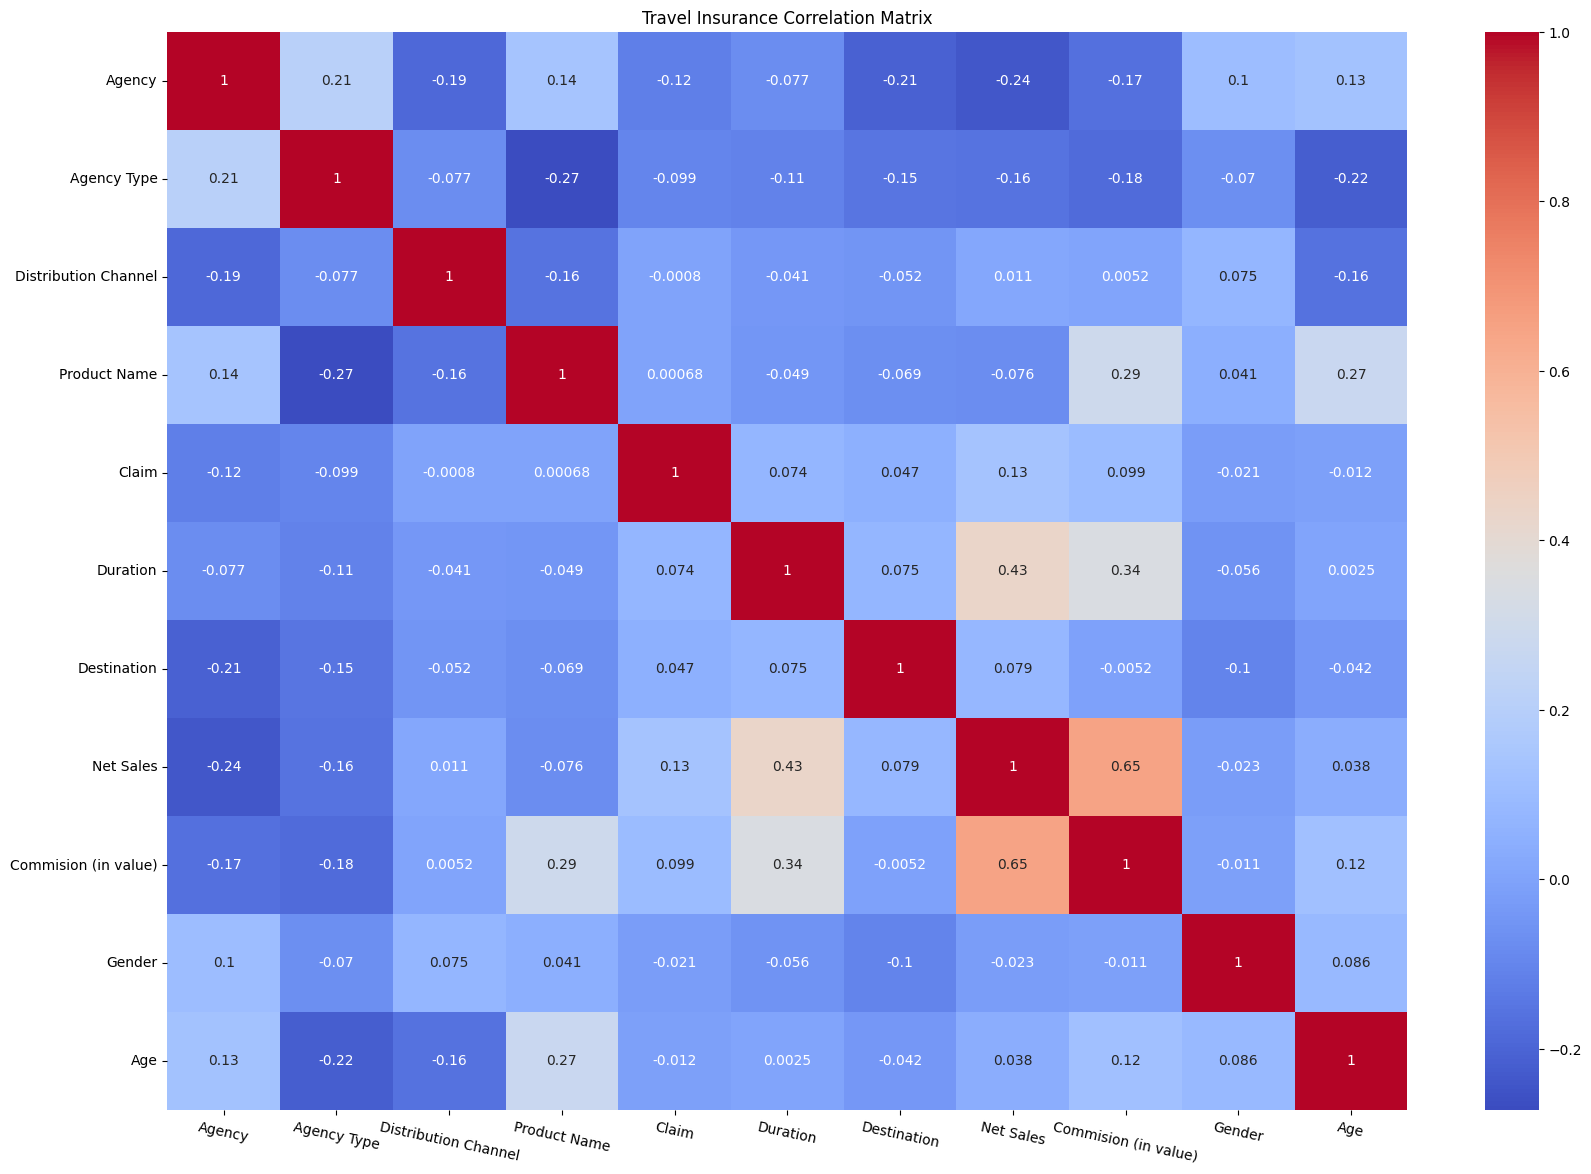

In [ ]:
# heatmap or correlation matrix
plt.figure(figsize=(20, 14))
df_travelInsurance = pd.read_csv('travel insurance.csv')

df_encode = {"Agency Type": {"Travel Agency" : 1, "Airlines" : 0}, "Distribution Channel" : {"Online":1, "Offline":0},
             "Claim": {"Yes":1, "No":0}, "Gender" : {"M":1, "F":0}}
df_travelInsurance = df_travelInsurance.replace(df_encode)

from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df_travelInsurance['Agency']=label_encoding.fit_transform(df_travelInsurance['Agency'])
df_travelInsurance['Product Name']=label_encoding.fit_transform(df_travelInsurance['Product Name'])
df_travelInsurance['Destination']=label_encoding.fit_transform(df_travelInsurance['Destination'])

correlation_matrix = df_travelInsurance.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')
plt.title('Travel Insurance Correlation Matrix')
plt.xticks(rotation=-12)
plt.show()

Menampilkan korelasi antar variabel menggunakan heatmap
- Highest Correlation Between Commision and Net Sales  
- Lowest Correlation Between Agency Type and Product Name


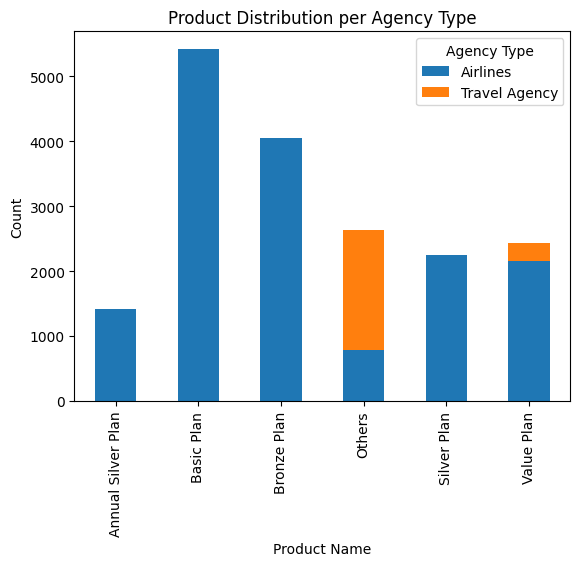

In [ ]:
product_counts = data['Product Name'].value_counts().reset_index()
product_counts.columns = ['Product Name', 'Count']

top_5_products = product_counts['Product Name'].iloc[:5].tolist()

data['Product Name'] = data['Product Name'].apply(lambda x: x if x in top_5_products else 'Others')

pivot_table = data.pivot_table(index='Product Name', columns='Agency Type', aggfunc='size')

pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.title('Product Distribution per Agency Type')
plt.show()

Basic Plan is the most popular product in Airlines, Others get more contribution in Travel Airlines

### UNIVARIATE

In [ ]:
# Distribution plot column 'Age'
fig = px.histogram(data, x="Age", title='Distribusi Usia')
fig.update_traces(marker_line_width=1.5, marker_line_color="black")
fig.update_layout(
    width=800,
    height=500,
    xaxis_tickangle=0
)
fig.show()

Looking at the distribution of the Age column, the age of 48 is the age that most people buy this insurance

### BIVARIATE


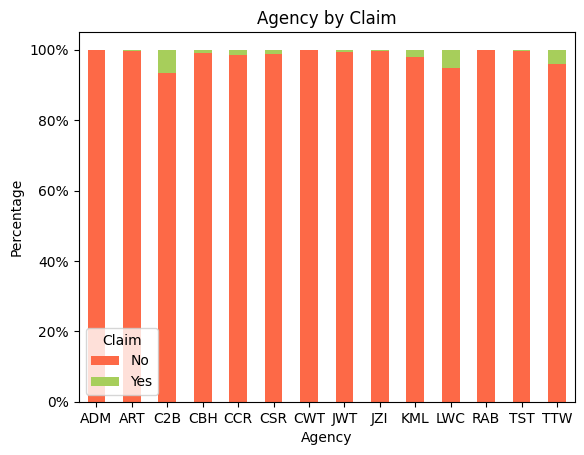

In [ ]:
# Agency dan Claim

colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}

(data.groupby('Agency')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=0)
plt.title('Agency by Claim')
plt.xlabel('Agency')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

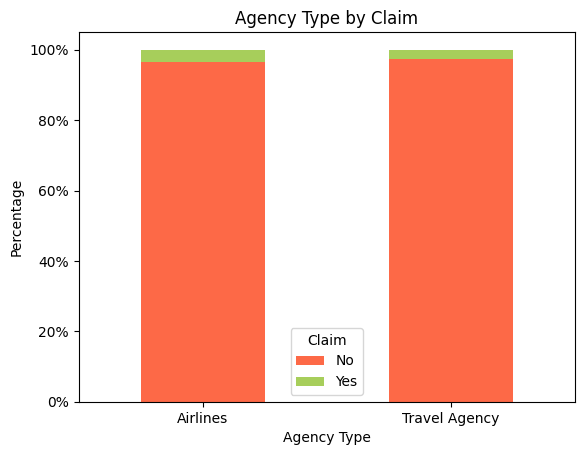

In [ ]:
# Agency Type dan Claim

colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}
(data.groupby('Agency Type')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=0)
plt.title('Agency Type by Claim')
plt.xlabel('Agency Type')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

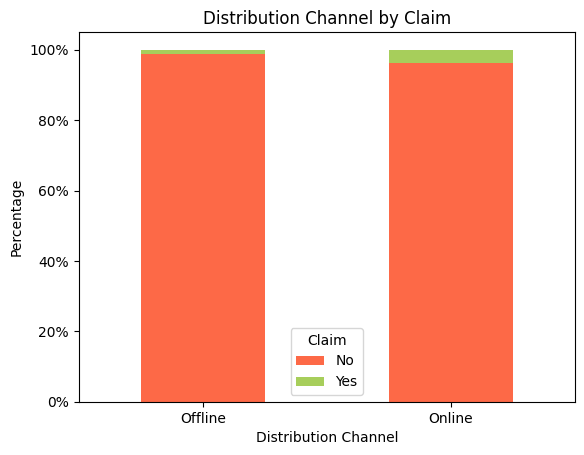

In [ ]:
# Distribution Channel dan Claim

colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}
(data.groupby('Distribution Channel')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=0)
plt.title('Distribution Channel by Claim')
plt.xlabel('Distribution Channel')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

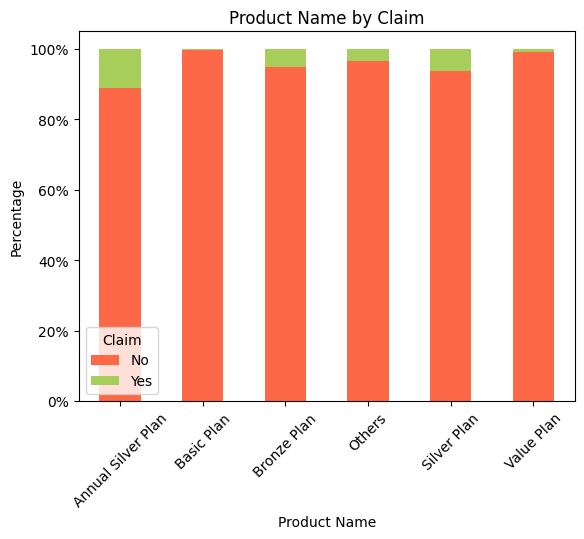

In [ ]:
# Product Name dan Claim

colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}
(data.groupby('Product Name')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=45)
plt.title('Product Name by Claim')
plt.xlabel('Product Name')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

In [ ]:
# Box plot for 'Net Sales' grouped by 'Claim'
fig = px.box(data, x='Claim', y='Net Sales', title='Distribusi Penjualan Bersih Berdasarkan Klaim')
fig.update_layout(
    width=800,
    height=500,
    xaxis_tickangle=0
)
fig.show()

Visualizing the correlation between the Net Sales and Claim columns using boxplot
if the claim is 'No' it means there is no important incident or event so because the customer has paid, it means the insurance is profitable (high net sales)

Possible reasons why many net sales in the claim 'No' are below 0 (loss):
- insurance is deliberately sold at a low price to attract customers, so if the customer is still new so it is not profitable

In [ ]:
# Box plot for 'Commision (in value)' grouped by 'Claim'
fig = px.box(data, x='Claim', y='Commision (in value)', title='Distribusi Komisi Berdasarkan Klaim')
fig.update_layout(
    width=800,
    height=500,
    xaxis_tickangle=0
)
fig.show()

Visualizing the correlation between Commission and Claim columns using boxplot
claim 'No' high commission because insurance does not pay out money

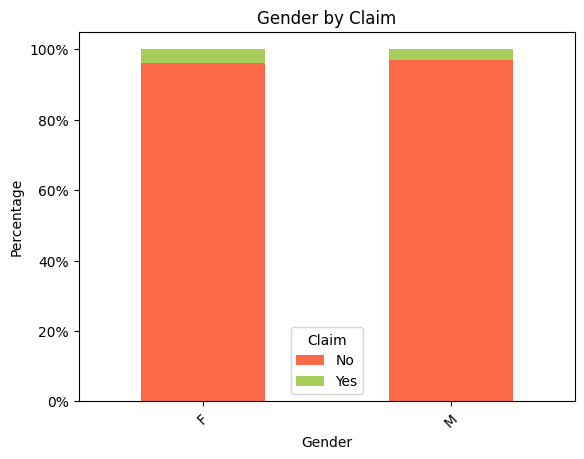

In [ ]:
# Gender dan Claim

colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}
(data.groupby('Gender')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=45)
plt.title('Gender by Claim')
plt.xlabel('Gender')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

## FEATURE ENGINEERING
- Binary Encoding kolom Claim, Gender

In [ ]:
data['Destination'].unique()

array(['MALAYSIA', 'UNITED STATES', 'NORWAY', 'SINGAPORE', 'INDIA',
       'BRUNEI DARUSSALAM', 'AUSTRALIA', 'INDONESIA', 'THAILAND', 'CHINA',
       'PHILIPPINES', 'HONG KONG', 'VIET NAM', 'CAMBODIA', 'AUSTRIA',
       'MYANMAR', 'JAPAN', 'TAIWAN, PROVINCE OF CHINA', 'SRI LANKA',
       'UNITED KINGDOM', 'FRANCE', 'GERMANY', 'NETHERLANDS', 'MACAO',
       'KOREA, REPUBLIC OF', 'UNITED ARAB EMIRATES', 'DENMARK',
       "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'ITALY', 'OMAN', 'NEW ZEALAND',
       'FIJI', 'POLAND', 'NEPAL', 'SPAIN', 'CANADA', 'BRAZIL', 'PORTUGAL',
       'IRELAND', 'NEW CALEDONIA', 'FINLAND', 'SAUDI ARABIA', 'JORDAN',
       'SWEDEN', 'GUINEA', 'TURKEY', 'BANGLADESH', 'MONGOLIA',
       'AZERBAIJAN', 'PAKISTAN', 'MOROCCO', 'SWITZERLAND', 'LITHUANIA',
       'MALI', 'BELGIUM', 'CZECH REPUBLIC', 'HUNGARY', 'PAPUA NEW GUINEA',
       'BAHRAIN', 'KENYA', 'MAURITIUS', 'CYPRUS', 'ANGOLA', 'BELARUS',
       'ESTONIA', 'ARGENTINA', 'NAMIBIA', 'BULGARIA', 'PERU', 'QATAR',
       'IS

In [ ]:
region_mapping = {
    'EAST ASIA': ['CHINA', 'JAPAN', 'TAIWAN, PROVINCE OF CHINA', 'KOREA, REPUBLIC OF', 'HONG KONG', 'MACAO', 'MONGOLIA'],
    'SOUTHEAST ASIA': ['MALAYSIA', 'SINGAPORE', 'BRUNEI DARUSSALAM', 'INDONESIA', 'THAILAND', 'PHILIPPINES', 'VIET NAM', 'CAMBODIA', 'MYANMAR', 'LAO PEOPLE\'S DEMOCRATIC REPUBLIC', 'NEPAL', 'BANGKOK'],
    'SOUTH ASIA': ['INDIA', 'SRI LANKA', 'PAKISTAN', 'BANGLADESH', 'BHUTAN'],
    'MIDDLE EAST': ['UNITED ARAB EMIRATES', 'SAUDI ARABIA', 'OMAN', 'QATAR', 'BAHRAIN', 'JORDAN', 'ISRAEL', 'TURKMENISTAN', 'EGYPT', 'IRAN, ISLAMIC REPUBLIC OF'],
    'EUROPE': ['UNITED KINGDOM', 'FRANCE', 'GERMANY', 'NETHERLANDS', 'AUSTRIA', 'ITALY', 'SWITZERLAND', 'SWEDEN', 'BELGIUM', 'CZECH REPUBLIC', 'HUNGARY', 'POLAND', 'PORTUGAL', 'IRELAND', 'DENMARK', 'FINLAND', 'ESTONIA', 'LATVIA', 'LITHUANIA'],
    'NORTH AMERICA': ['UNITED STATES', 'CANADA'],
    'OCEANIA': ['AUSTRALIA', 'NEW ZEALAND', 'FIJI', 'PAPUA NEW GUINEA'],
    'LATIN AMERICA': ['BRAZIL', 'ARGENTINA', 'MEXICO', 'PERU', 'BOLIVIA', 'CHILE'],
    'AFRICA': ['KENYA', 'MAURITIUS', 'SOUTH AFRICA', 'ANGOLA', 'GUINEA'],
    'OTHERS': ['RUSSIAN FEDERATION', 'AZERBAIJAN', 'BELARUS', 'CYPRUS', 'ESTONIA', 'LATVIA']
}

def categorize_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'OTHERS'

data['Region'] = data['Destination'].apply(categorize_region)
data.drop('Destination', axis=1, inplace=True)
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Gender,Age,Region
0,CBH,Travel Agency,Offline,Others,No,186,-29.0,9.57,F,81,SOUTHEAST ASIA
1,CBH,Travel Agency,Offline,Others,No,186,-29.0,9.57,F,71,SOUTHEAST ASIA
5,JZI,Airlines,Online,Value Plan,No,66,-121.0,42.35,F,44,NORTH AMERICA
11,JZI,Airlines,Online,Basic Plan,No,1,-18.0,6.30,M,47,SOUTHEAST ASIA
12,KML,Travel Agency,Online,Others,No,53,-130.0,49.40,F,48,OTHERS


Mapping each destination into several regions according to their respective regions, and dropping the destination column and replacing it with the region column

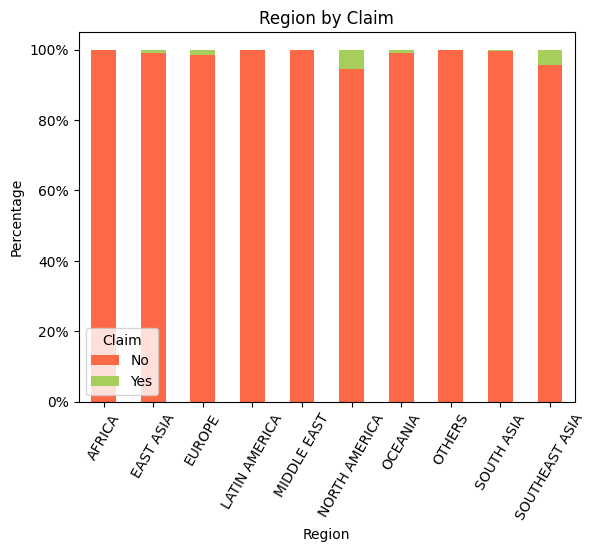

In [ ]:
# Region dan Claim

colors = {'Yes': '#A7CE5B', 'No': '#FD6947'}
(data.groupby('Region')['Claim'].value_counts(normalize=True)
   .unstack('Claim')
   .plot.bar(stacked=True, color=colors)
)

# title dan axis labels
plt.xticks(rotation=60)
plt.title('Region by Claim')
plt.xlabel('Region')
plt.ylabel('Percentage')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))

In [ ]:
# Drop Column who is not significant
data.drop(['Agency Type', 'Gender'], axis=1, inplace=True)
data.head()

,Agency,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Region
0,CBH,Offline,Others,No,186,-29.0,9.57,81,SOUTHEAST ASIA
1,CBH,Offline,Others,No,186,-29.0,9.57,71,SOUTHEAST ASIA
5,JZI,Online,Value Plan,No,66,-121.0,42.35,44,NORTH AMERICA
11,JZI,Online,Basic Plan,No,1,-18.0,6.30,47,SOUTHEAST ASIA
12,KML,Online,Others,No,53,-130.0,49.40,48,OTHERS


In [ ]:
# Binary Encoding
data['Claim'] = data['Claim'].replace({'Yes': 1, 'No': 0})
data['Distribution Channel'] = data['Distribution Channel'].replace({'Online': 1, 'Offline': 0})
data.head()

<ipython-input-24-842e709b4c7f>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-24-842e709b4c7f>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Agency,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Region
0,CBH,0,Others,0,186,-29.0,9.57,81,SOUTHEAST ASIA
1,CBH,0,Others,0,186,-29.0,9.57,71,SOUTHEAST ASIA
5,JZI,1,Value Plan,0,66,-121.0,42.35,44,NORTH AMERICA
11,JZI,1,Basic Plan,0,1,-18.0,6.30,47,SOUTHEAST ASIA
12,KML,1,Others,0,53,-130.0,49.40,48,OTHERS


Converting categorical data to numeric using encoding for claim and distribution channel columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform = 'pandas')
encoded_job = encoder.fit_transform(data[['Agency']])
data = pd.concat([data, encoded_job.astype('int')],  axis = 1)
data = data.drop(columns = ['Agency'])

encoder = OneHotEncoder(sparse_output = False, drop = 'first').set_output(transform = 'pandas')
encoded_job = encoder.fit_transform(data[['Region']])
data = pd.concat([data, encoded_job.astype('int')],  axis = 1)
data = data.drop(columns = ['Region'])

data.head()

,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,...,Agency_TTW,Region_EAST ASIA,Region_EUROPE,Region_LATIN AMERICA,Region_MIDDLE EAST,Region_NORTH AMERICA,Region_OCEANIA,Region_OTHERS,Region_SOUTH ASIA,Region_SOUTHEAST ASIA
0,0,Others,0,186,-29.0,9.57,81,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,Others,0,186,-29.0,9.57,71,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1,Value Plan,0,66,-121.0,42.35,44,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,Basic Plan,0,1,-18.0,6.30,47,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,1,Others,0,53,-130.0,49.40,48,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Create a new column for each unique value in the agency and region columns using the one hot encoding method

In [ ]:
# Label Encoding
data['Product Name'] = data['Product Name'].replace({'Others' : 0, 'Value Plan' : 1, 'Basic Plan' : 2, 'Bronze Plan' : 3, 'Silver Plan' : 4, 'Annual Silver Plan' : 5})
data.head()

<ipython-input-26-8550b72e625d>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Distribution Channel,Product Name,Claim,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,...,Agency_TTW,Region_EAST ASIA,Region_EUROPE,Region_LATIN AMERICA,Region_MIDDLE EAST,Region_NORTH AMERICA,Region_OCEANIA,Region_OTHERS,Region_SOUTH ASIA,Region_SOUTHEAST ASIA
0,0,0,0,186,-29.0,9.57,81,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,186,-29.0,9.57,71,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,1,1,0,66,-121.0,42.35,44,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11,1,2,0,1,-18.0,6.30,47,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,1,0,0,53,-130.0,49.40,48,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Convert categorical data in Product Name to numeric using encoding and display the first 5 data from the dataset